# Gaussian Process - fit a sinoid 2

Solely purpose of this notebook is to make the model actually observe the underlying data and take it into account. We will stick with the sin function and modify the condition function so that it doesn't spit out a mu and sigma for the normally distributed y. Instead we want it to spit out a sin(x), perhaps in terms of a normal, we will see. Anyone can see that it under any circumstances have to see the Y data somehow.

**Success!!!**

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from random import sample

## 1 - Simulated data

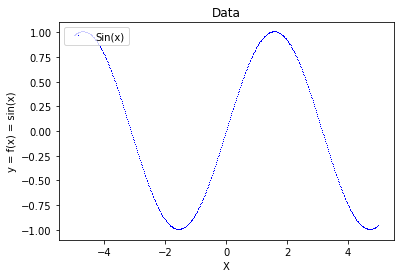

In [2]:
n = 500
X_data = np.linspace(-5, 5, n)
Y_data = np.sin(X_data)
plt.title('Data')
plt.plot(X_data, Y_data, 'b,', label='Sin(x)')
plt.xlabel('X')
plt.ylabel('y = f(x) = sin(x)')
plt.legend(loc='upper left')
plt.show()

## 2 - GP Functions

In [56]:
def kernel(a, b):
    return np.exp(-.5 * 1/.1 * (np.subtract.outer(a, b)**2))
    
def conditional(x_new, x, y):
    A = kernel(x, x)
    B = kernel(x, x_new)
    C = kernel(x_new, x_new)
    mu = np.dot(B.T, np.linalg.inv(A)).dot(y)
    sigma = C - np.dot(B.T, np.linalg.inv(A)).dot(B)
    return (mu.squeeze(), sigma.squeeze())
    
def predict(x, data, K, t):
    Kx = [kernel(x, x_) for x_ in data]
    Kinv = np.linalg.inv(K + 1e-15*np.eye(len(K)))
    y_pred = np.dot(Kx, Kinv).dot(t)
    sigma_new = kernel(x, x) - np.dot(Kx, Kinv).dot(Kx)
    return y_pred, sigma_new

def fit(X_data, Y_data, m=5, art=False):
    # Define m datapoints to condition on
    X_conditional = sample(list(X_data), m)
    X_conditional.sort()
    # Store results
    gp = list()
    # Sample first GP from an unconditional Gaussian
    sigma_prior = kernel(0, 0)
    x = [X_conditional[0]]
    y = [np.sin(X_conditional)]
    K = kernel(x, x)
    y_pred, sigmas = np.transpose([predict(i, x, K, y) for i in X_data])
    gp.append((y_pred, sigmas))
    # Sample rest of conditional GP
    for x_new in X_conditional[1:]:
        y_new = [np.sin(x_new)]
        x.append(x_new)
        y.append(y_new)
        K = kernel(x, x)
        y_pred, sigmas = np.transpose([predict(i, x, K, y) for i in X_data])
        gp.append((y_pred, sigmas))
    if art:
        plt.title('Num observations:' + str(m))
        plt.errorbar(X_data, y_pred, yerr=sigmas, color='b')
        plt.plot(x, y, 'ro', label='observations')
        plt.plot(X_data, Y_data, 'g,', label='true data')
        plt.xlabel('X')
        plt.ylabel('y = f(x) = sin(x)')
        plt.ylim(-np.amax(np.square(y))-.5, np.amax(np.square(y))+.5)
        plt.legend(loc='upper left')
        plt.show()
        
    return gp

def fit_with_observations(X_data, Y_data, m=m,art= False):
    X_conditional = sample(list(X_data), m)
    X_conditional.sort()
    x, y, = list(), list()
    for x_new in X_conditional[:]:
        y_new = np.sin(x_new)
        x.append(x_new)
        y.append(y_new)
        K = kernel(x, x)
        y_pred, sigmas = np.transpose([predict(i, x, K, y) for i in X_data])
        gp.append((y_pred, sigmas))
    if art:
        plt.title('Num observations:' + str(m))
        plt.errorbar(X_data, y_pred, yerr=sigmas, color='y', zorder=1)
        plt.plot(X_data, y_pred, 'b', label='prediction', zorder=3)
        plt.plot(x, y, 'ro', label='observations', zorder=4)
        plt.plot(X_data, Y_data, 'g', label='true data', zorder=2)
        plt.xlabel('X')
        plt.ylabel('y = f(x) = sin(x)')
        plt.ylim(-np.amax(np.square(y))-.5, np.amax(np.square(y))+.5)
        plt.legend(loc='upper left')
        plt.show()

## 3 - Fit GPModels on data

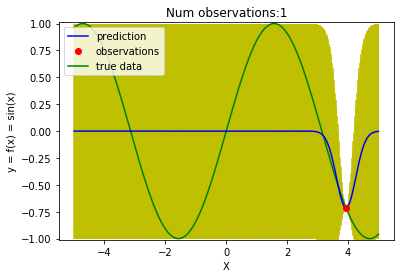

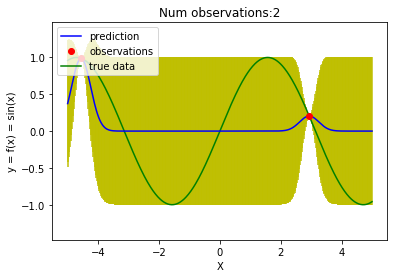

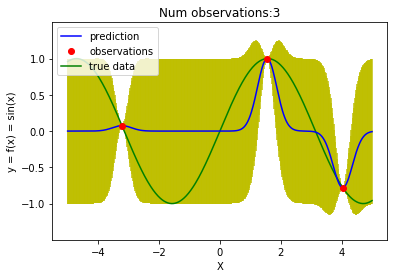

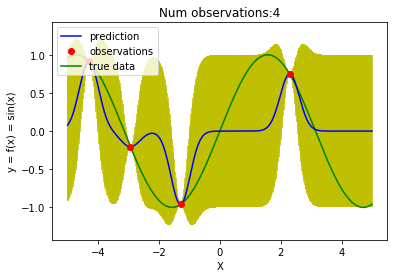

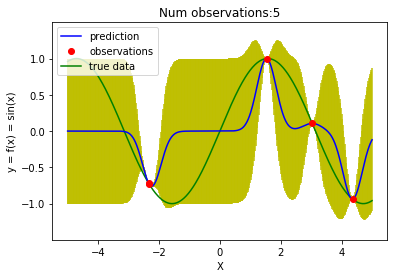

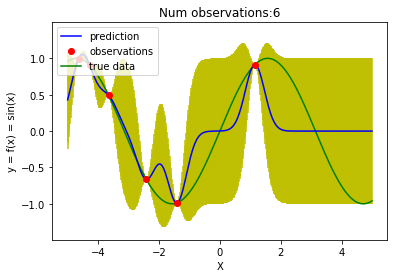

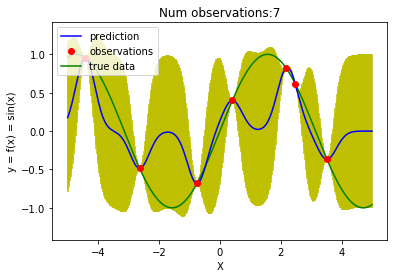

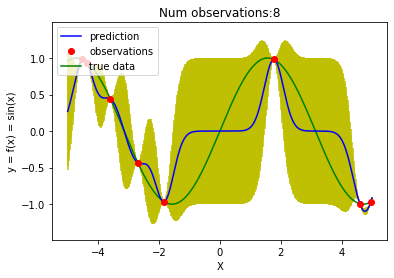

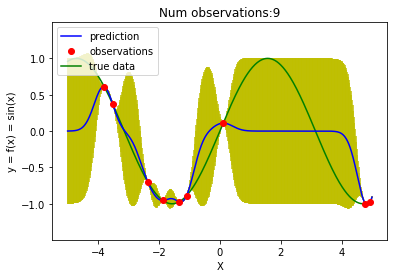

In [61]:
for m in range(1, 10):
    fit_with_observations(X_data, Y_data, m=m, art=True)

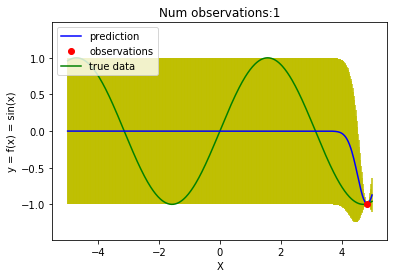

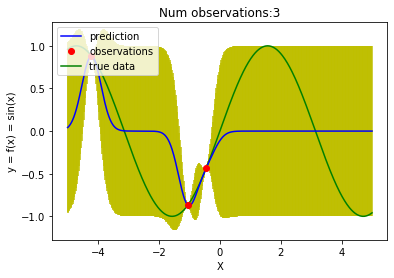

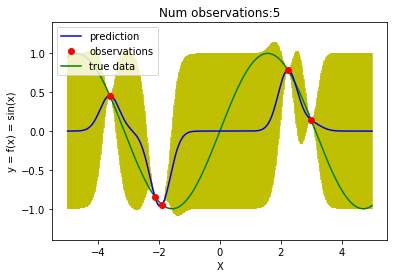

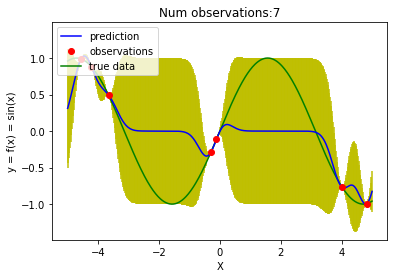

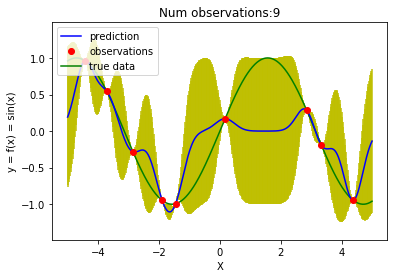

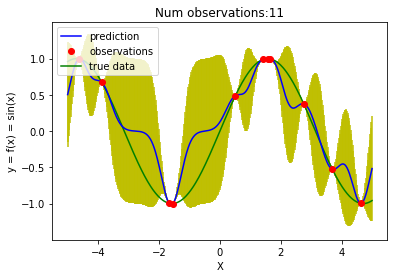

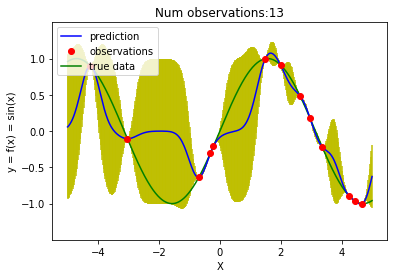

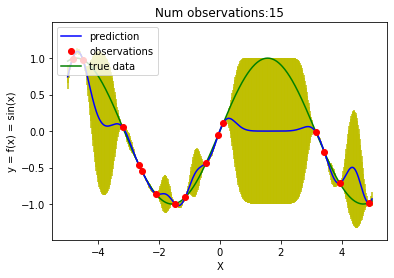

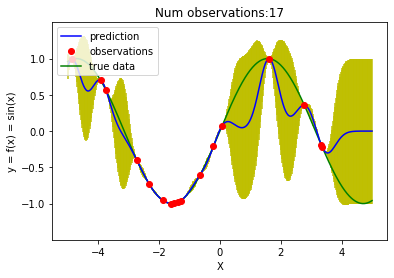

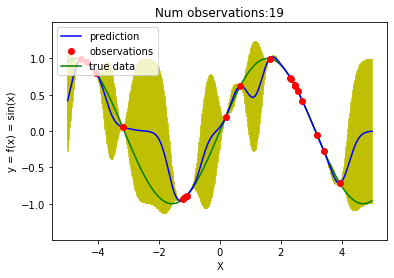

In [62]:
for m in range(1, 20, 2):
    fit_with_observations(X_data, Y_data, m=m, art=True)

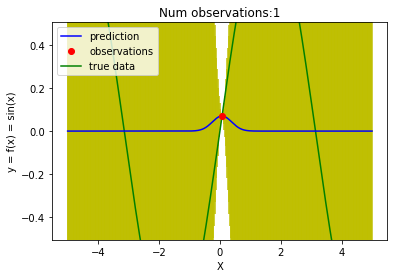

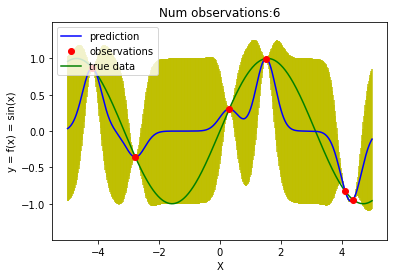

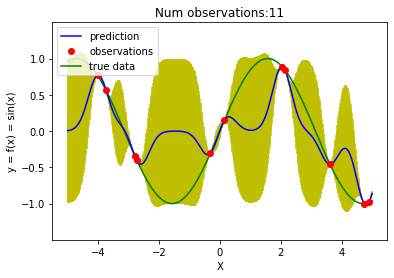

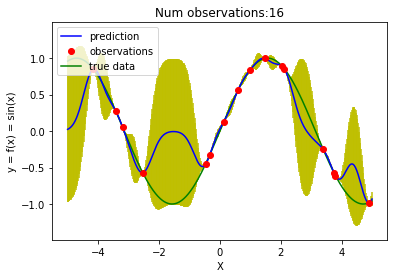

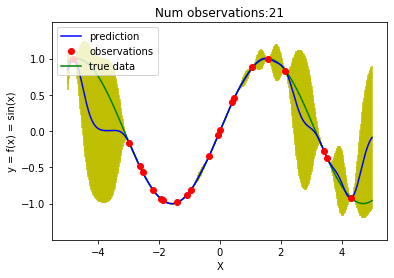

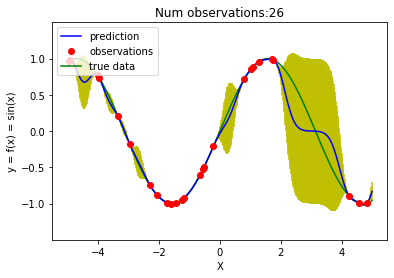

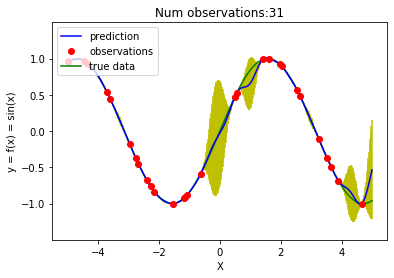

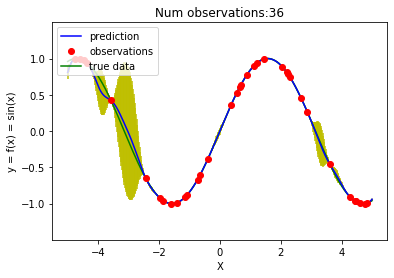

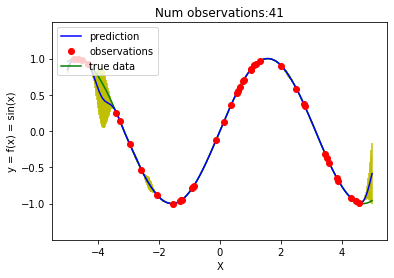

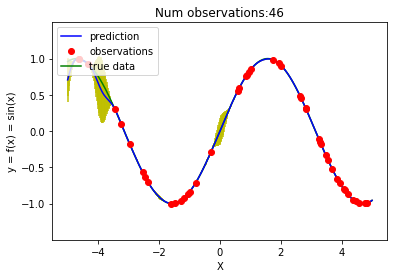

In [63]:
for m in range(1, 50, 5):
    fit_with_observations(X_data, Y_data, m=m, art=True)